# UTS



In [1]:
pip install ucimlrepo

Perintah pip install ucimlrepo digunakan untuk menginstal library Python bernama ucimlrepo, yang memungkinkan pengguna untuk mengakses dan mengambil dataset langsung dari UCI Machine Learning Repository tanpa perlu mengunduh file secara manual. Library ini sangat memudahkan proses eksplorasi data karena dataset yang diambil akan langsung tersedia dalam bentuk pandas.DataFrame, lengkap dengan metadata dan informasi variabelnya. Dengan ucimlrepo, proses pengambilan data menjadi lebih efisien dan terintegrasi langsung dalam workflow analisis data di Python.

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

# data (as pandas dataframes)
X = cirrhosis_patient_survival_prediction.data.features
y = cirrhosis_patient_survival_prediction.data.targets

# metadata
print(cirrhosis_patient_survival_prediction.metadata)

# variable information
print(cirrhosis_patient_survival_prediction.variables)


{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'ID': 296, 'type'

Kode tersebut digunakan untuk mengambil dataset "Cirrhosis Patient Survival Prediction" dari UCI Machine Learning Repository menggunakan library ucimlrepo. Fungsi fetch_ucirepo(id=878) secara otomatis mengunduh dan memuat dataset dengan ID 878 ke dalam Python. Data yang diperoleh kemudian dipisahkan menjadi X untuk fitur (variabel input) dan y untuk target (label atau output) dalam format pandas.DataFrame, sehingga siap untuk dianalisis atau digunakan dalam pemodelan machine learning. Selain itu, kode ini juga mencetak metadata yang berisi informasi umum tentang dataset, serta detail setiap variabel (fitur) melalui print(cirrhosis_patient_survival_prediction.variables), yang membantu pengguna memahami struktur dan isi dataset secara menyeluruh.

In [9]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ==============================
# 1. PENGAMBILAN DAN PEMAHAMAN DATA
# ==============================
# Fetch dataset
cirrhosis = fetch_ucirepo(id=878)

# Data
X = cirrhosis.data.features
y = cirrhosis.data.targets

# Tampilkan metadata dan variabel
print("Metadata:\n", cirrhosis.metadata)
print("\nInformasi Variabel:\n", cirrhosis.variables)

# Tinjau data awal
print("\n5 Baris Pertama Data:\n", X.head())
print("\nTarget:\n", y.head())

# Informasi data
print("\nInfo Data:\n")
print(X.info())

# Cek nilai yang hilang
print("\nMissing Values per Kolom:\n", X.isnull().sum())

# Statistik deskriptif
print("\nDeskripsi Statistik:\n", X.describe(include='all'))

Metadata:
 {'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'ID': 

Kode di atas merupakan tahap awal dalam proses analisis data, yaitu **pengambilan dan pemahaman data (data understanding)**, yang dilakukan terhadap dataset *Cirrhosis Patient Survival Prediction* dari UCI Machine Learning Repository. Pertama, dataset diambil menggunakan fungsi `fetch_ucirepo(id=878)` dari library `ucimlrepo`, dan kemudian dipisahkan menjadi `X` (fitur atau variabel input) dan `y` (target/output). Selanjutnya, kode menampilkan **metadata** dan **informasi variabel** yang membantu pengguna memahami konteks dataset, seperti deskripsi dataset dan tipe masing-masing fitur. Lalu ditampilkan juga **lima baris pertama** dari dataset dan target untuk memberikan gambaran awal terhadap isi data. Kode kemudian memanggil `X.info()` untuk mengetahui struktur data, tipe data tiap kolom, dan jumlah nilai non-null, serta `X.isnull().sum()` untuk mengecek jumlah nilai yang hilang pada setiap kolom. Terakhir, `X.describe(include='all')` digunakan untuk menampilkan statistik deskriptif dari semua kolom, baik numerik maupun kategorikal, sehingga pengguna bisa memahami distribusi dan karakteristik umum dari masing-masing fitur dalam dataset. Tahap ini penting untuk merancang strategi preprocessing dan pemodelan selanjutnya.

 5 Data Teratas:
              Drug    Age Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  \
0  D-penicillamine  21464   F       Y            Y       Y     Y       14.5   
1  D-penicillamine  20617   F       N            Y       Y     N        1.1   
2  D-penicillamine  25594   M       N            N       N     S        1.4   
3  D-penicillamine  19994   F       N            Y       Y     S        1.8   
4          Placebo  13918   F       N            Y       Y     N        3.4   

  Cholesterol  Albumin Copper  Alk_Phos    SGOT Tryglicerides Platelets  \
0         261     2.60    156    1718.0  137.95           172       190   
1         302     4.14     54    7394.8  113.52            88       221   
2         176     3.48    210     516.0   96.10            55       151   
3         244     2.54     64    6121.8   60.63            92       183   
4         279     3.53    143     671.0  113.15            72       136   

   Prothrombin  Stage Status  
0         12.2    4.0     

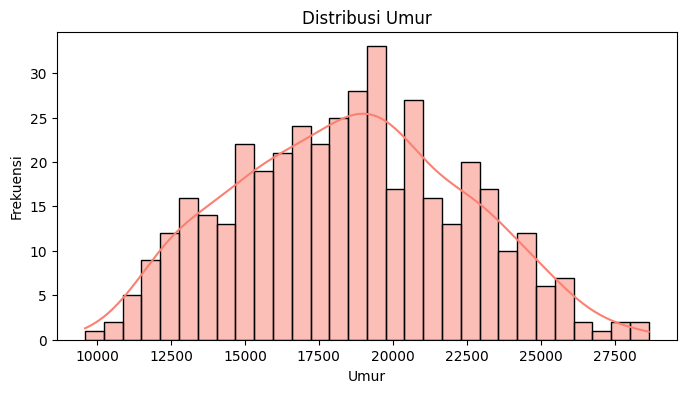

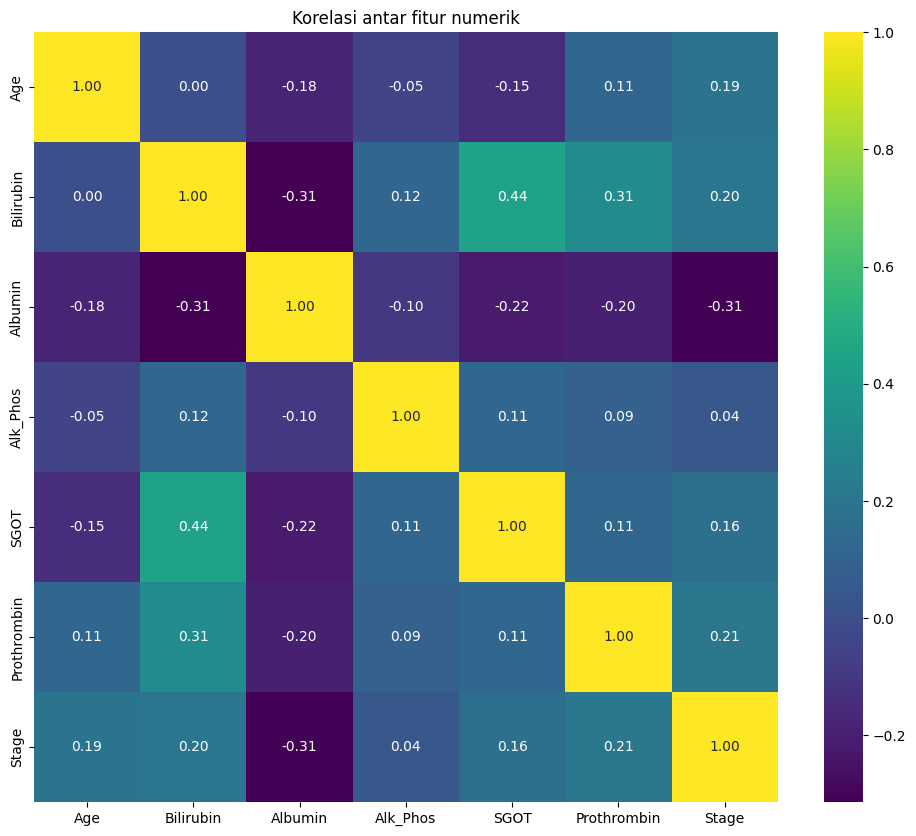

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gabungkan fitur dan target agar mudah dianalisis bersama
df = pd.concat([X, y], axis=1)

# 1. Tampilkan data teratas
print(" 5 Data Teratas:")
print(df.head())


# 2. Distribusi kategori (jika ada kolom kategorikal)
kategori_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in kategori_cols:
    print(f"\n Distribusi nilai pada kolom '{col}':")
    print(df[col].value_counts())

# 3. Visualisasi distribusi umur (jika ada)
if 'Age' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df['Age'], bins=30, kde=True, color='salmon')
    plt.title('Distribusi Umur')
    plt.xlabel('Umur')
    plt.ylabel('Frekuensi')
    plt.show()

# 4. Korelasi antar fitur numerik
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis', fmt=".2f")
plt.title("Korelasi antar fitur numerik")
plt.show()

 penjelasan setiap bagian dari kode tersebut:

1. Menggabungkan Fitur dan Target: Data fitur (X) dan
target (y) digabungkan menjadi satu DataFrame df menggunakan pd.concat(). Ini memudahkan analisis karena target dan fitur bisa dianalisis bersama dalam satu struktur data.

2. Menampilkan Data Teratas: Fungsi df.head() digunakan untuk menampilkan 5 baris pertama dari dataset. Ini memberikan gambaran awal tentang data yang ada, baik itu format, nilai, maupun kolom yang ada dalam dataset.

3. Distribusi Kategori: Untuk kolom yang memiliki tipe data kategorikal (misalnya, kolom dengan tipe string), kode ini menghitung frekuensi nilai-nilai yang ada menggunakan value_counts(). Ini memberikan wawasan tentang distribusi kategori dalam dataset, misalnya, berapa banyak pasien yang menggunakan obat tertentu atau berapa banyak pasien yang memiliki kondisi tertentu.

4. Visualisasi Distribusi Umur: Jika kolom Age ada dalam dataset, kode ini membuat histogram untuk menunjukkan distribusi umur pasien dengan menggunakan seaborn.histplot(). Visualisasi ini membantu untuk melihat apakah distribusi umur pasien cenderung normal, skewed, atau ada pola lain, dan ini penting untuk memahami karakteristik data yang ada.

5. Korelasi Antar Fitur Numerik: Menggunakan sns.heatmap(), kode ini menghasilkan heatmap yang menunjukkan korelasi antar fitur numerik dalam dataset. Setiap sel dalam heatmap menampilkan nilai korelasi antara dua fitur, dengan warna yang berbeda untuk menunjukkan kekuatan korelasi. Korelasi yang kuat (positif atau negatif) menunjukkan hubungan yang erat antara dua variabel, yang dapat membantu dalam memahami fitur-fitur yang saling memengaruhi satu sama lain.

Secara keseluruhan, kode ini membantu dalam tahap eksplorasi data awal untuk memahami distribusi nilai, hubungan antar fitur, dan visualisasi data yang dapat memandu proses analisis dan pemodelan selanjutnya.

Kolom numerik  : 7 kolom
Kolom kategori : 10 kolom
Total fitur setelah encoding: 776


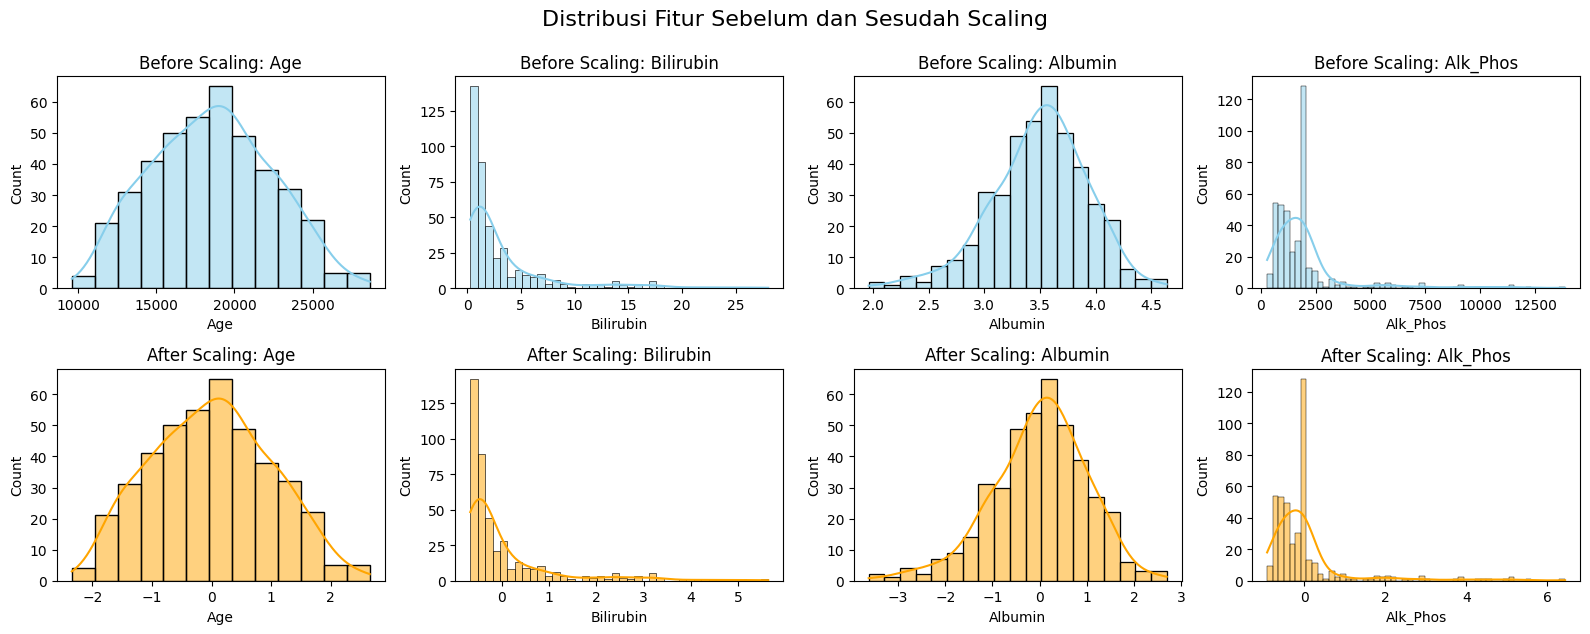

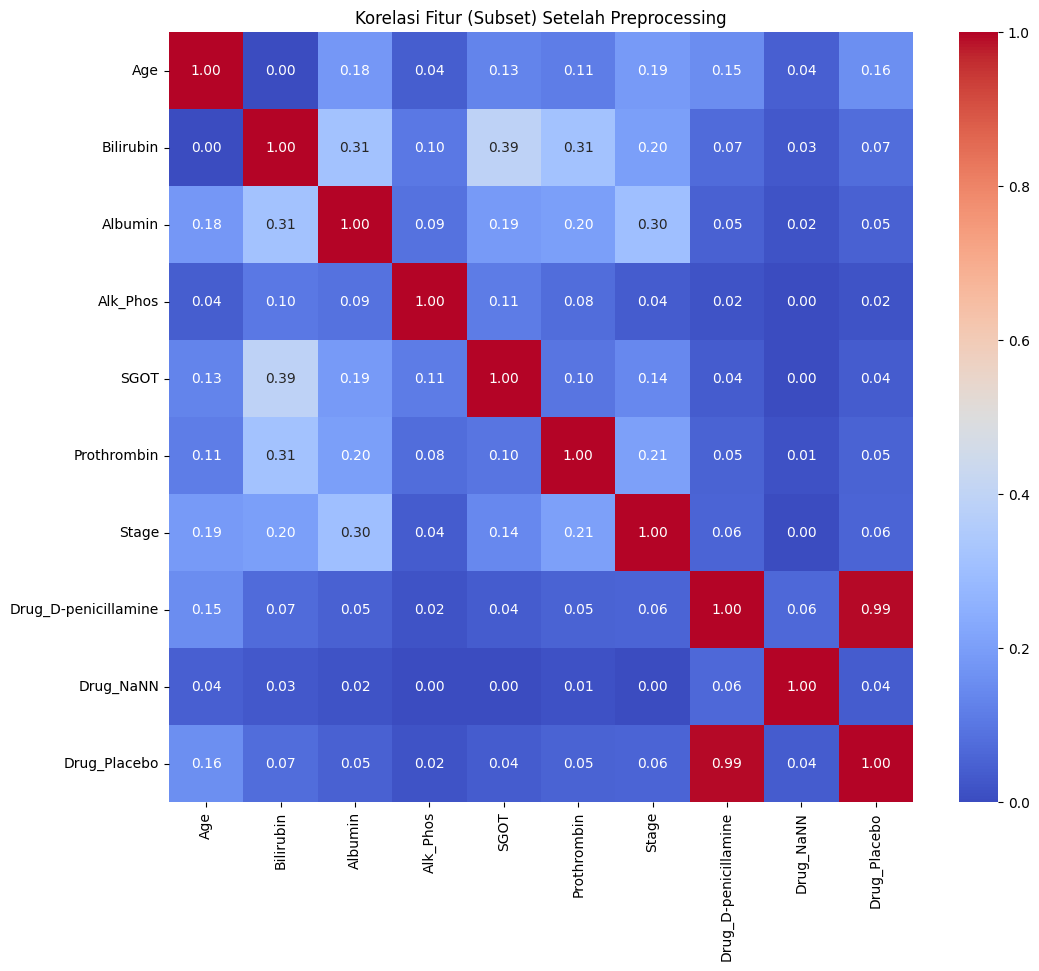

Preprocessing selesai. Data siap digunakan untuk pemodelan.


In [21]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================
# 2. PREPROCESSING DATA
# ==============================

# Pisahkan kolom numerik dan kategorikal
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

print(f"Kolom numerik  : {len(num_cols)} kolom")
print(f"Kolom kategori : {len(cat_cols)} kolom")

# Imputasi nilai hilang pada kolom numerik
num_imputer = SimpleImputer(strategy='mean')
X_num = pd.DataFrame(num_imputer.fit_transform(X[num_cols]), columns=num_cols)

# Imputasi nilai hilang pada kolom kategorikal
cat_imputer = SimpleImputer(strategy='most_frequent')
X_cat = pd.DataFrame(cat_imputer.fit_transform(X[cat_cols]), columns=cat_cols)

# Gabungkan kembali data numerik dan kategorikal yang sudah dibersihkan
X_clean = pd.concat([X_num, X_cat], axis=1)

# One-hot encoding untuk kolom kategorikal
X_encoded = pd.get_dummies(X_clean)
print(f"Total fitur setelah encoding: {X_encoded.shape[1]}")

# Standardisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

# ==============================
# VISUALISASI PREPROCESSING
# ==============================

# 1. Distribusi beberapa fitur numerik sebelum dan sesudah scaling
selected_features = num_cols[:4]  # Ambil 4 fitur numerik pertama

fig, axes = plt.subplots(2, len(selected_features), figsize=(16, 6))

for i, col in enumerate(selected_features):
    # Sebelum scaling
    sns.histplot(X_num[col], kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f"Before Scaling: {col}")

    # Sesudah scaling
    sns.histplot(X_scaled_df[col], kde=True, ax=axes[1, i], color='orange')
    axes[1, i].set_title(f"After Scaling: {col}")

plt.tight_layout()
plt.suptitle("Distribusi Fitur Sebelum dan Sesudah Scaling", fontsize=16, y=1.05)
plt.show()

# 2. Korelasi fitur setelah preprocessing
plt.figure(figsize=(12, 10))
sns.heatmap(X_scaled_df.corr().abs().iloc[:10, :10], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Fitur (Subset) Setelah Preprocessing")
plt.show()

print("Preprocessing selesai. Data siap digunakan untuk pemodelan.")


1.  Preprocessing

Kode di atas melakukan proses preprocessing data secara lengkap dan sistematis sebelum digunakan untuk pemodelan. Pertama, data dipisahkan menjadi dua jenis: kolom numerik dan kolom kategorikal. Untuk kolom numerik, digunakan teknik imputasi rata-rata (mean) untuk mengganti nilai yang hilang, sedangkan untuk kolom kategorikal digunakan most frequent (nilai yang paling sering muncul). Setelah nilai yang hilang ditangani, data numerik dan kategorikal digabung kembali. Selanjutnya, dilakukan encoding pada kolom kategorikal menggunakan one-hot encoding agar bisa digunakan oleh model machine learning. Setelah semua kolom menjadi numerik, dilakukan standardisasi (scaling) menggunakan StandardScaler, yang menyamakan skala antar fitur agar model tidak bias terhadap fitur dengan skala besar.

Visualisasi dilakukan dalam dua bagian: pertama, untuk membandingkan distribusi beberapa fitur numerik sebelum dan sesudah scaling menggunakan histogram dengan KDE (Kernel Density Estimation); ini membantu melihat bagaimana bentuk distribusi berubah setelah preprocessing. Kedua, dibuat heatmap korelasi antar fitur setelah preprocessing untuk membantu memahami hubungan antar fitur dan mendeteksi kemungkinan adanya korelasi tinggi antar fitur yang dapat memengaruhi model. Secara keseluruhan, proses ini memastikan bahwa data dalam kondisi bersih, terstandardisasi, dan siap digunakan untuk proses pemodelan lebih lanjut.


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Random Forest berhasil dilatih.
Jumlah pohon (n_estimators): 100
Fitur yang digunakan: 776


<ipython-input-18-ce763a7ceb82>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature', palette='viridis')


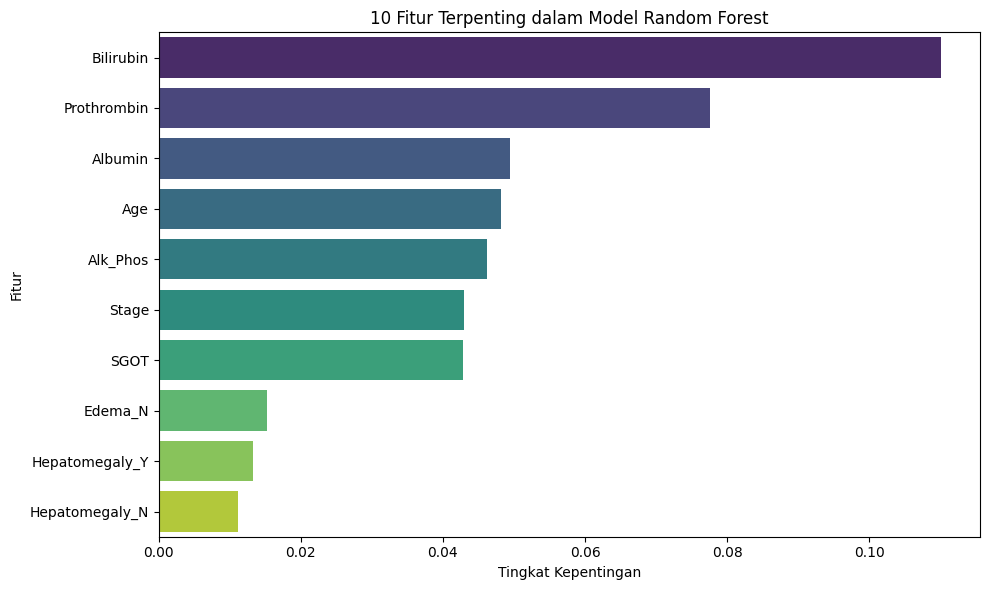

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Tampilkan informasi model
print("Model Random Forest berhasil dilatih.")
print(f"Jumlah pohon (n_estimators): {model.n_estimators}")
print(f"Fitur yang digunakan: {X_encoded.shape[1]}")

# Menampilkan pentingnya fitur
importances = model.feature_importances_
feature_names = X_encoded.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualisasi 10 fitur terpenting
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("10 Fitur Terpenting dalam Model Random Forest")
plt.xlabel("Tingkat Kepentingan")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()


2. pemodelan

Kode tersebut digunakan untuk membangun dan melatih model klasifikasi menggunakan algoritma Random Forest, serta menganalisis fitur-fitur yang paling berpengaruh dalam prediksi. Pertama, data dibagi menjadi data latih dan data uji dengan perbandingan 80:20. Model Random Forest kemudian diinisialisasi dan dilatih pada data latih. Setelah pelatihan, informasi dasar model seperti jumlah pohon (estimators) dan jumlah fitur ditampilkan. Selanjutnya, dihitung nilai pentingnya setiap fitur (feature importance), yang menggambarkan kontribusi masing-masing fitur terhadap hasil prediksi. Nilai-nilai ini disusun dalam DataFrame dan divisualisasikan dalam bentuk bar chart yang menunjukkan 10 fitur paling berpengaruh dalam model, sehingga memudahkan interpretasi dan pemahaman terhadap perilaku model.

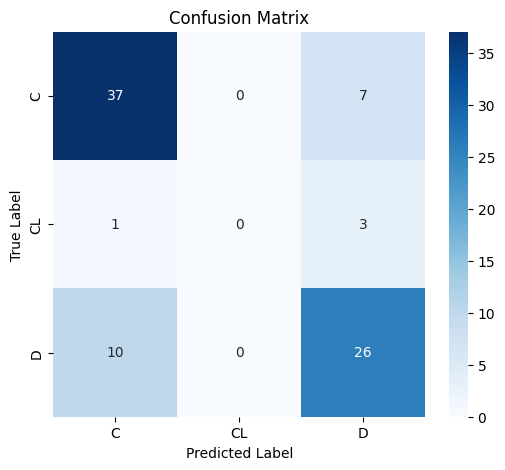

Classification Report:



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
C,0.77,0.84,0.80,44.00
CL,0.00,0.00,0.00,4.00
D,0.72,0.72,0.72,36.00
accuracy,0.75,0.75,0.75,0.75
macro avg,0.50,0.52,0.51,84.00
weighted avg,0.71,0.75,0.73,84.00


Akurasi Model: 75.00%


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prediksi
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report sebagai DataFrame
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Classification Report:\n")
display(report_df.round(2))

# Akurasi
akurasi = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {akurasi*100:.2f}%")


3. evaluasi

Kode tersebut digunakan untuk melakukan evaluasi model klasifikasi secara komprehensif dan profesional. Pertama, model digunakan untuk memprediksi data uji, lalu hasilnya dibandingkan dengan label asli menggunakan confusion matrix yang divisualisasikan dalam bentuk heatmap untuk mempermudah interpretasi kesalahan dan keberhasilan klasifikasi antar kelas. Selanjutnya, metrik evaluasi seperti precision, recall, dan f1-score ditampilkan dalam bentuk tabel menggunakan pandas.DataFrame, memberikan gambaran detail tentang performa model untuk tiap kelas. Terakhir, akurasi model dihitung menggunakan accuracy_score dan ditampilkan dalam bentuk persentase, yang mencerminkan seberapa banyak prediksi model yang benar secara keseluruhan. Pendekatan ini sangat cocok untuk analisis laporan, dokumentasi hasil, atau presentasi karena menyajikan evaluasi secara visual dan numerik dengan jelas.